# Homework #2 (due 10th of November, 11:59 PM):


### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data. You can select two features for x and y axes at a time and color the samples according to their classes. You are not expected to try all pairs, which would be too many. But please show a few examples. 
- Also use box plots to look at the data. Please show that you are able to examine some features (not all them are necessary).
- Create a training and test set (with shuffling).
- Train a **decision tree classifier** using the training set.
- What are the top 5 most important (discriminative) features?
- Train a **logistic regression model** using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
421        14.69         13.98           98.22      656.1          0.10310   
47         13.17         18.66           85.98      534.6          0.11580   
292        12.95         16.02           83.14      513.7          0.10050   
186        18.31         18.58          118.60     1041.0          0.08588   
414        15.13         29.81           96.71      719.5          0.08320   
..           ...           ...             ...        ...              ...   
129        19.79         25.12          130.40     1192.0          0.10150   
144        10.75         14.97           68.26      355.3          0.07793   
72         17.20         24.52          114.20      929.4          0.10710   
235        14.03         21.25           89.79      603.4          0.09070   
37         13.03         18.42           82.61      523.8          0.08983   

     mean compactness  mean concavity  mean concave points  mea

C:\Users\Ahmet\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


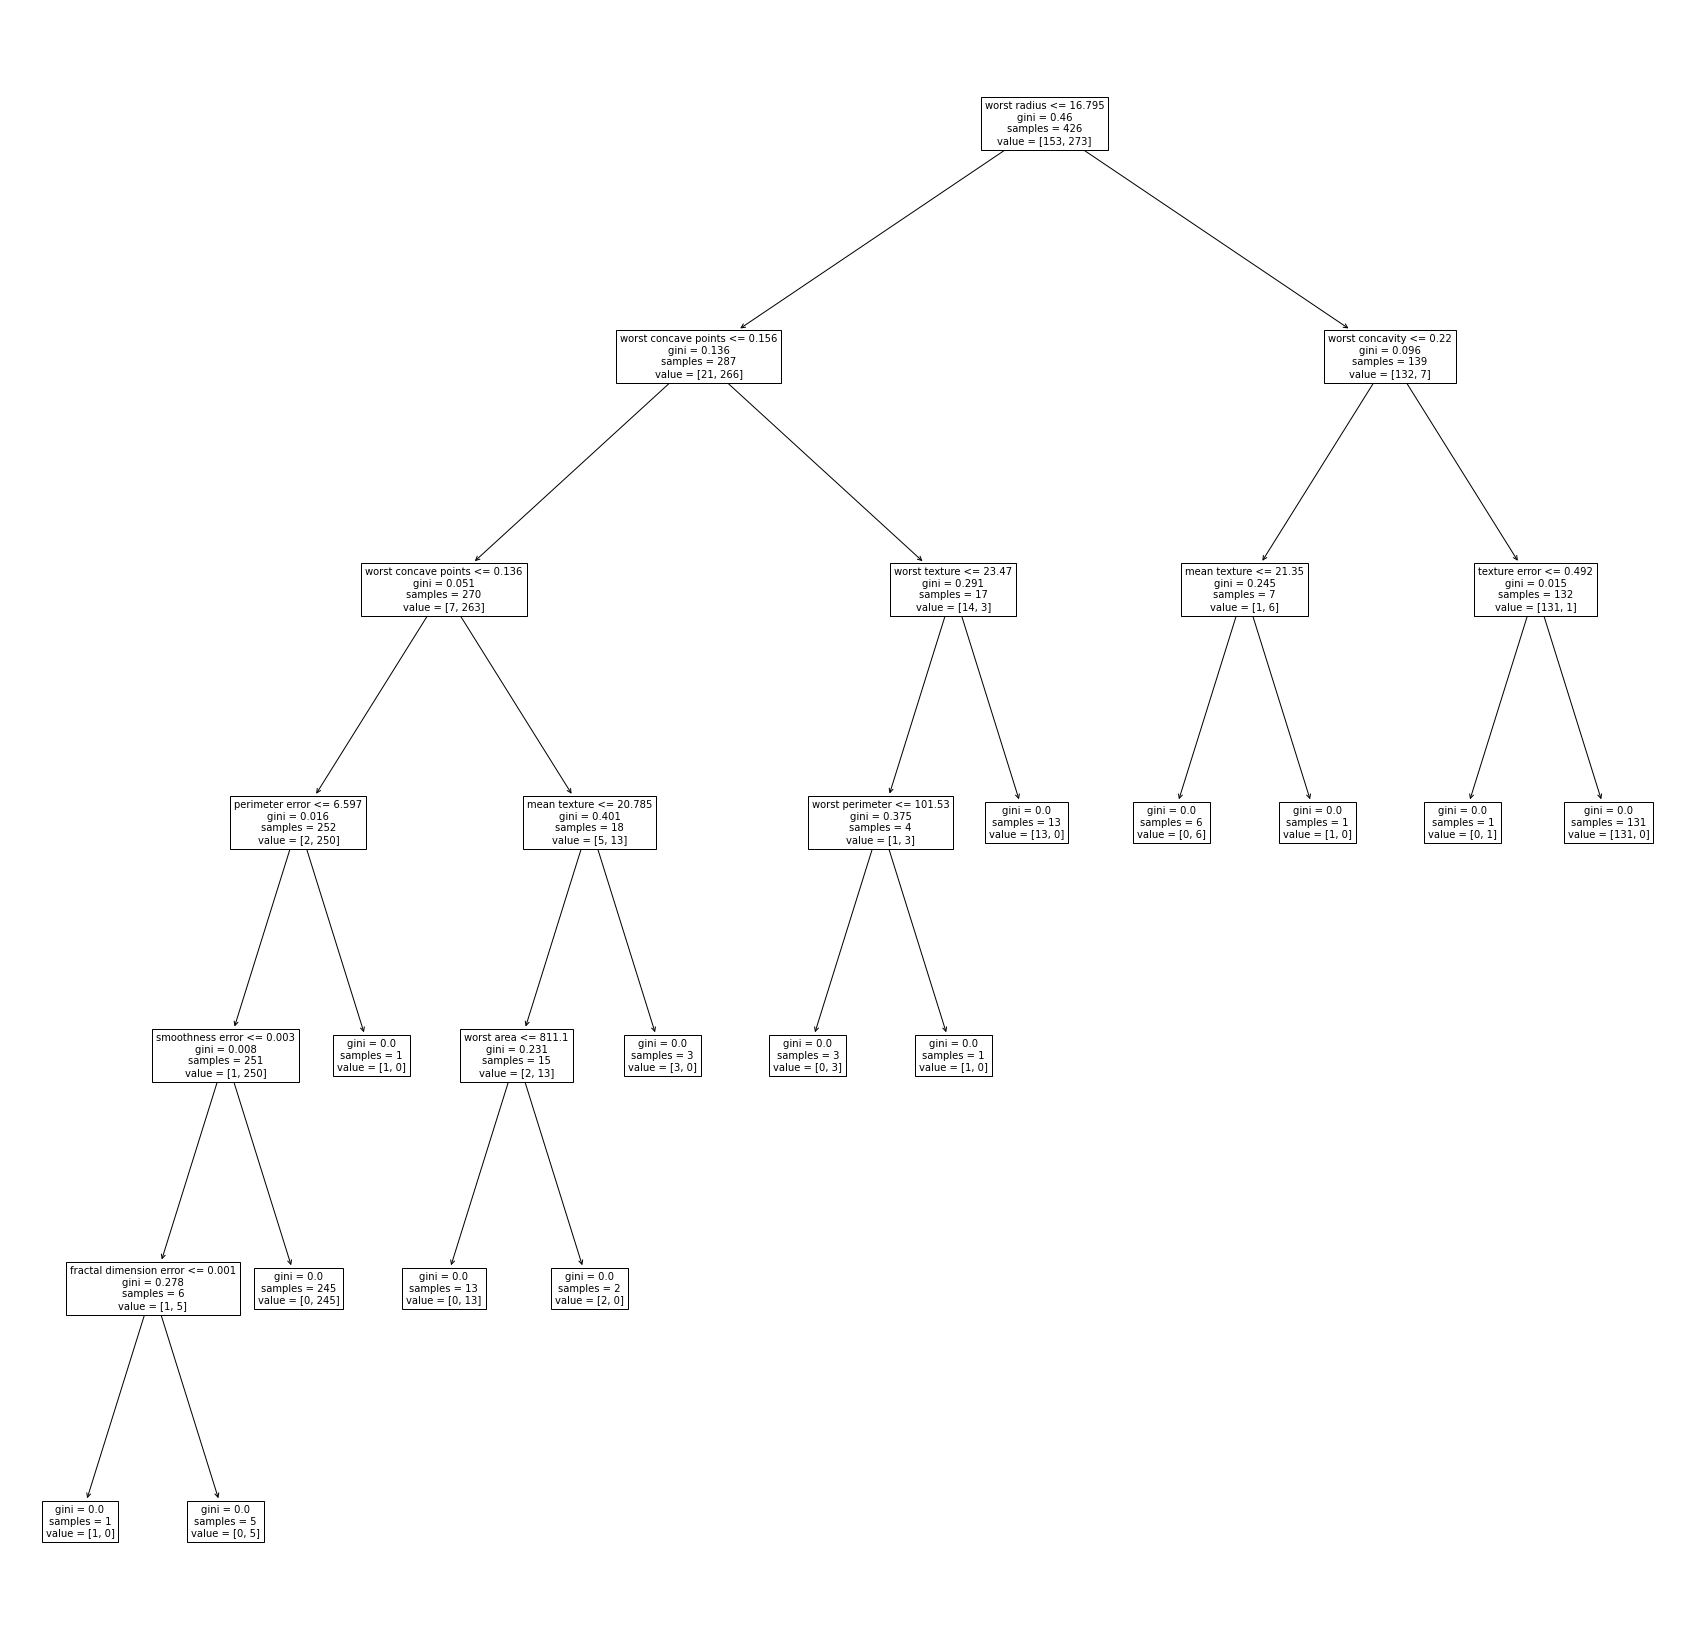

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree as tr
from sklearn.utils import shuffle


data = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
cancer_df = shuffle(pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']),random_state = 1)
print(cancer_df)
cancer_df.head(5)



train_df, test_df = train_test_split(cancer_df)
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(train_df.drop('target', axis=1), train_df['target'])

pyplot.figure(figsize=(30,30))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

array([0.        , 0.02789332, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01012169, 0.0100777 , 0.        , 0.00165919,
       0.        , 0.        , 0.        , 0.        , 0.00849913,
       0.73369623, 0.0175482 , 0.00764921, 0.01767818, 0.        ,
       0.        , 0.0489337 , 0.11624345, 0.        , 0.        ])

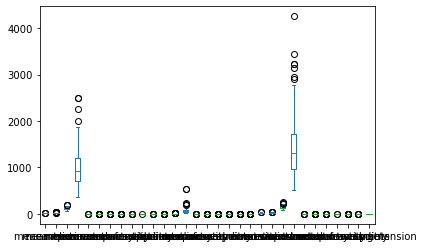

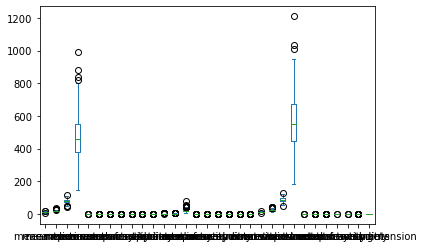

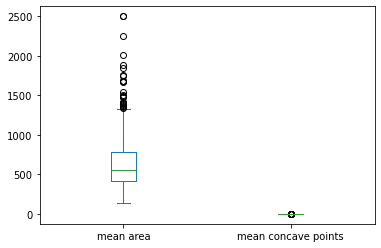

In [2]:

cancer_df[cancer_df['target']==0].plot.box()
cancer_df[cancer_df['target']==1].plot.box()
cancer_df[["mean area","mean concave points"]].plot.box()
tree.feature_importances_

In [3]:
cancer_df[cancer_df['target']==1].describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.0
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,1.0
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804,0.0
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,1.0
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,...,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090,1.0
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,...,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120,1.0
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,...,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410,1.0
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600,1.0


C:\Users\Ahmet\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Ahmet\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


0.9230769230769231

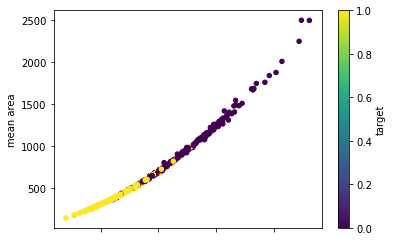

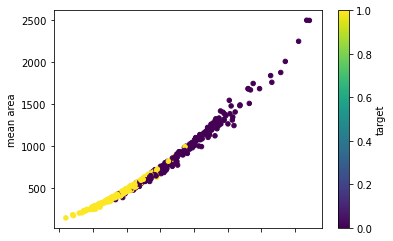

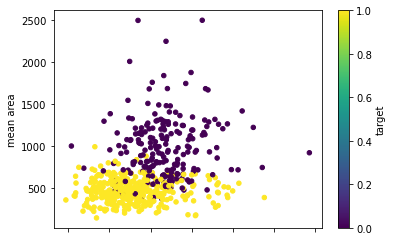

In [4]:
cancer_df.plot.scatter(x='mean radius',y='mean area',s=20,c='target',colormap='viridis')
cancer_df.plot.scatter(x='mean perimeter',y='mean area',s=20,c='target',colormap='viridis')
cancer_df.plot.scatter(x='mean texture',y='mean area',s=20,c='target',colormap='viridis')

lr_orig = LogisticRegression(C=0.01, max_iter=1000)
lr_orig.fit(train_df.drop(['target'], axis=1),train_df['target'])
lr_orig.score(test_df.drop(['target'],axis=1),test_df['target'])


### Part 2)

- Get *winequality_white.csv* which uploaded with the Homework file.

- Last column (quality) is the target variable.

- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

In [5]:
import pandas as pd
df = pd.read_csv('winequality_white.csv',delimiter = ";")  # ı took this code from https://www.w3schools.com/python/pandas/pandas_csv.asp
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

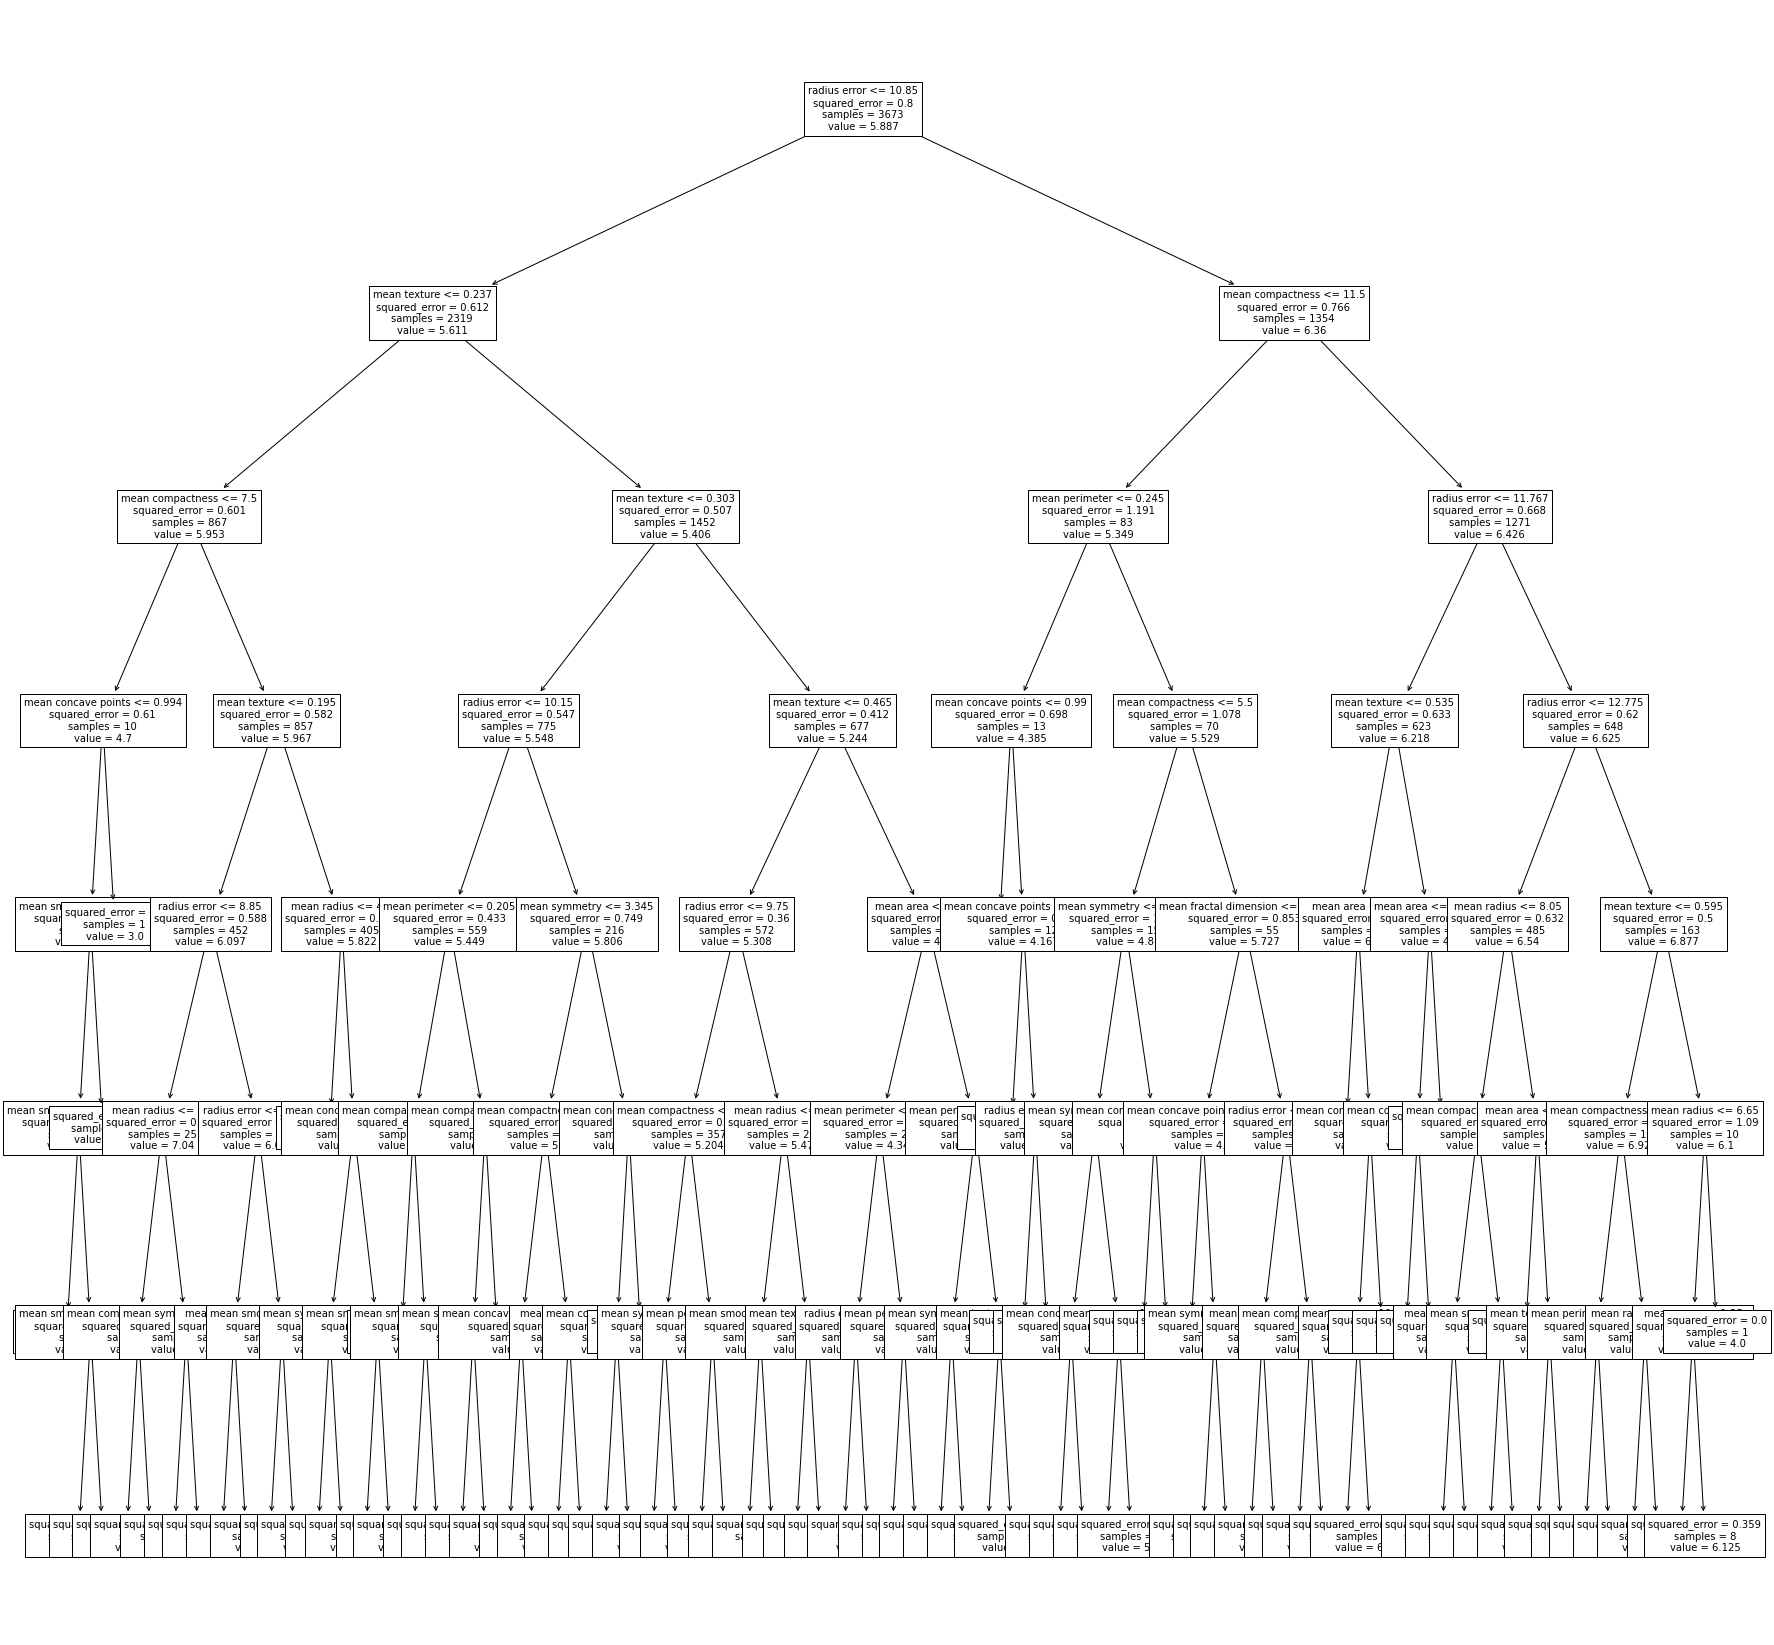

In [6]:
train_df2, test_df2 = train_test_split(df)
tree2 = DecisionTreeRegressor(max_depth = 7,min_samples_split= 3)
tree2.fit(train_df2.drop('quality', axis=1), train_df2['quality'])

pyplot.figure(figsize=(30,30))
tr.plot_tree(tree2, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

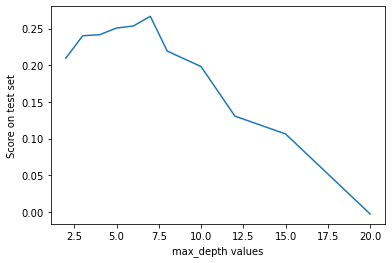

In [7]:
mdepths = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]
scores = np.zeros(11)
index=0

for d in mdepths:
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_split=5)
    tree_reg.fit(train_df2.drop('quality',axis=1),train_df2['quality'])
    #u=mean_squared_error(tree_reg.predict(housing_test_df.drop('target',axis=1)), housing_test_df['target'])
    u=tree_reg.score(test_df2.drop('quality',axis=1),test_df2['quality'])
    scores[index]=u
    index+=1

x = np.array(range(0,11))
pyplot.plot(mdepths, scores)
pyplot.xlabel('max_depth values')
pyplot.ylabel('Score on test set')
pyplot.show()

In [8]:
print(scores)

[ 0.20963409  0.24030588  0.24169842  0.25077841  0.25367048  0.2667622
  0.21936355  0.19826617  0.13067496  0.10632882 -0.00283448]


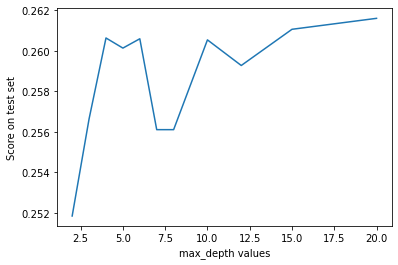

In [9]:
mSplits = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]
scores = np.zeros(11)
index=0

for d in mdepths:
    tree_reg = DecisionTreeRegressor(max_depth=6, min_samples_split=d) # max_depth = 6
    tree_reg.fit(train_df2.drop('quality',axis=1),train_df2['quality'])
    #u=mean_squared_error(tree_reg.predict(housing_test_df.drop('target',axis=1)), housing_test_df['target'])
    u=tree_reg.score(test_df2.drop('quality',axis=1),test_df2['quality'])
    scores[index]=u
    index+=1

x = np.array(range(0,11))
pyplot.plot(mSplits, scores)
pyplot.xlabel('max_depth values')
pyplot.ylabel('Score on test set')
pyplot.show()

In [10]:
print(scores)

[0.25183239 0.25663142 0.26063061 0.26013071 0.26059123 0.25609983
 0.25609983 0.26053654 0.25927089 0.26105958 0.261601  ]


In [11]:
tree_reg = DecisionTreeRegressor(max_depth=6, min_samples_split=6)
tree_reg.fit(train_df2.drop('quality',axis=1),train_df2['quality'])
tree_reg.score(test_df2.drop('quality',axis=1), test_df2['quality'])

0.2605912343255654

In [12]:
print("MSE :\n")
mean_squared_error(tree_reg.predict(test_df2.drop('quality',axis=1)), test_df2['quality'])

MSE :



0.5450257461660305